# TCRpeg embeddings

In [1]:
# Add autoreload for easier development
%load_ext autoreload
%autoreload 2

In [10]:
import numpy as np
import pandas as pd
import os
import faiss

In [3]:
from tcrpeg_toolkit.embedding_clustering import EmbeddingClustering
from tcrpeg_toolkit.umap_generator import UMAPGenerator
from tcrpeg_toolkit.embedding_handler import EmbeddingHandler

In [11]:
sample_1 = EmbeddingClustering("results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy")

INFO - Data loaded from results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy


In [12]:
sample_1_clusters = sample_1.run(k=1, sample_size=100)

INFO - Data loaded was downsampled to 100
INFO - Applying hdbscan...
INFO - Silhouette score: 0.23343585431575775
INFO - Davies-Bouldin score: 1.4535948321756342
INFO - Calinski-Harabasz score: 26.507343848376784


Clustering 100 points in 640D to 1 clusters, redo 1 times, 10 iterations
  Preprocessing in 0.00 s
  Iteration 9 (0.00 s, search 0.00 s): objective=340.728 imbalance=1.000 nsplit=0       
Updating metadata with column: cluster
Updating metadata with column: cluster_hdbscan
Updating metadata with column: cluster_metrics
Updating metadata with metric: silhouette_score
Updating metadata with metric: davies_bouldin_score
Updating metadata with metric: calinski_harabasz_score
Updating metadata with metric: graph_0_average_degree
Updating metadata with metric: graph_0_density
Updating metadata with metric: graph_0_average_clustering_coefficient
Updating metadata with column: cluster_group


In [13]:
sample_1_clusters.metadata

,id,cluster,cluster_hdbscan,cluster_metrics,cluster_metrics_silhouette_score,cluster_metrics_davies_bouldin_score,cluster_metrics_calinski_harabasz_score,cluster_metrics_graph_0_average_degree,cluster_metrics_graph_0_density,cluster_metrics_graph_0_average_clustering_coefficient,cluster_group
0,250,0,-1,-1,0.233436,1.453595,26.507344,34.86,0.352121,1.0,outlier
1,377,0,1,1,0.233436,1.453595,26.507344,34.86,0.352121,1.0,clustered
2,102,0,1,1,0.233436,1.453595,26.507344,34.86,0.352121,1.0,clustered
3,375,0,0,0,0.233436,1.453595,26.507344,34.86,0.352121,1.0,clustered
4,168,0,1,1,0.233436,1.453595,26.507344,34.86,0.352121,1.0,clustered
...,...,...,...,...,...,...,...,...,...,...,...
95,306,0,1,1,0.233436,1.453595,26.507344,34.86,0.352121,1.0,clustered
96,166,0,1,1,0.233436,1.453595,26.507344,34.86,0.352121,1.0,clustered
97,299,0,1,1,0.233436,1.453595,26.507344,34.86,0.352121,1.0,clustered
98,212,0,1,1,0.233436,1.453595,26.507344,34.86,0.352121,1.0,clustered


In [14]:
sample_1_clusters_umap = UMAPGenerator(sample_1_clusters)

Loaded Embedding Object


In [15]:
sample_1_clusters_umap.run()

#### Optional parameters with kwargs

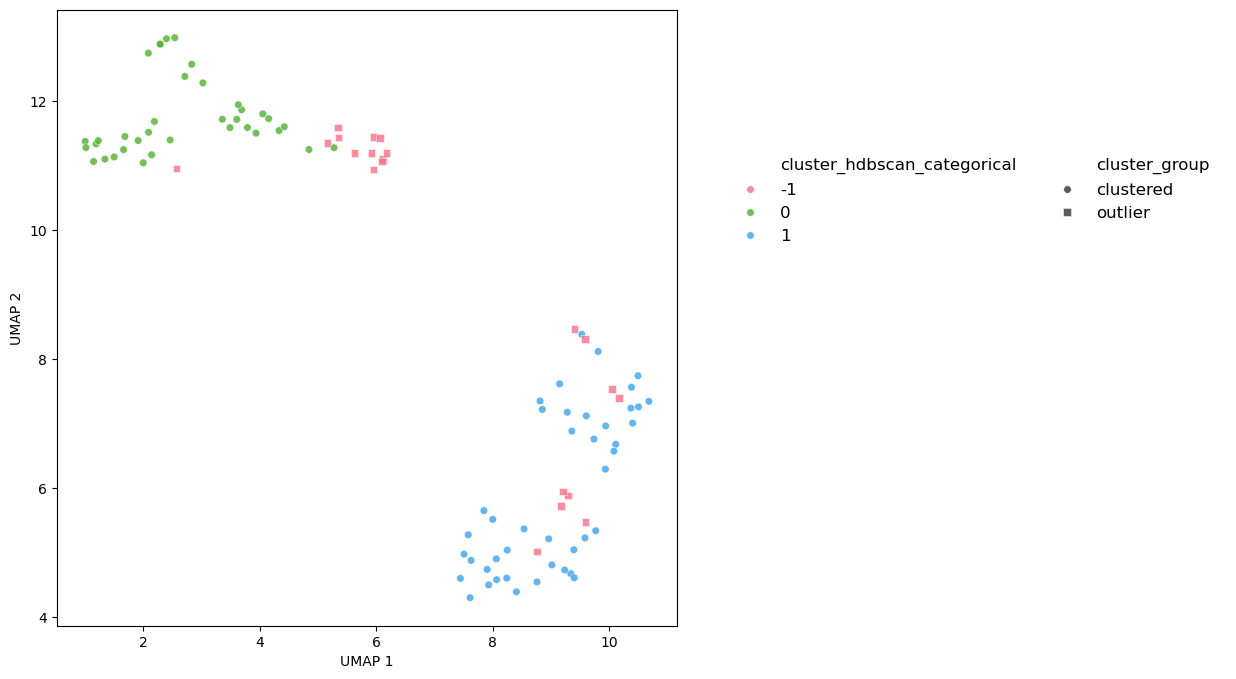

In [65]:
sample_1_clusters_umap.plot_umap(hue='cluster_hdbscan', edgecolor='white', 
                                 alpha=0.8, style='cluster_group',
                                 figsize=(8, 8), s=30,
                                 scatter_kwargs={'markers': ["o", "s"], 
                                              'style_order': ['clustered', 'outlier']},
                                 legend_kwargs={'loc': 'upper right', 'bbox_to_anchor': (1.9, 0.8),
                                                'shadow':True})

## Minimum spanning tree

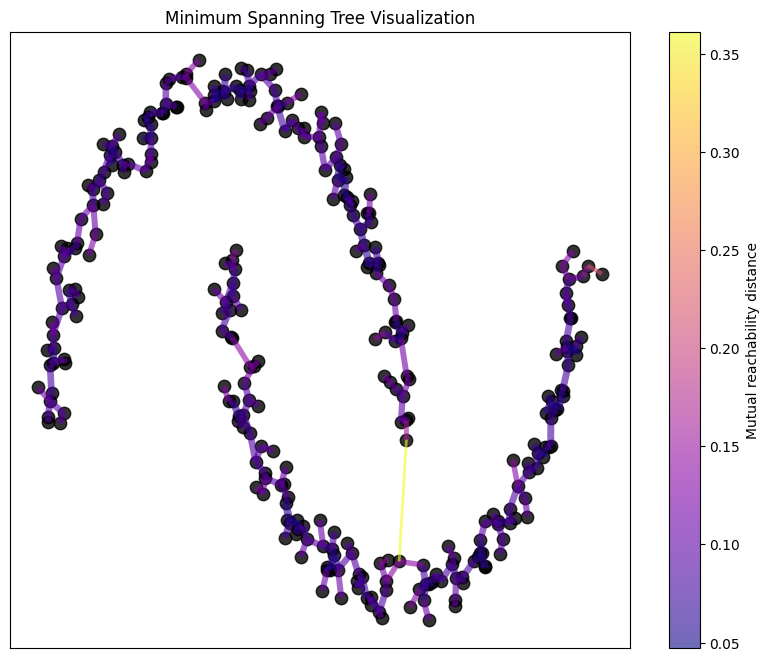

In [141]:
import numpy as np
import hdbscan
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate sample data
data, _ = make_moons(n_samples=300, noise=0.05)

# Cluster the data with HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(data)

# Access the minimum spanning tree
mst = clusterer.minimum_spanning_tree_

# Plot the minimum spanning tree
plt.figure(figsize=(10, 8))
mst.plot(edge_cmap='plasma', 
         edge_alpha=0.6, 
         node_size=80, 
         edge_linewidth=2)
plt.title('Minimum Spanning Tree Visualization')
plt.show()

In [14]:
import networkx as nx
import hdbscan
from sklearn.datasets import make_blobs
import numpy as np

# Generate some data
data, _ = make_blobs(n_samples=100, centers=3, random_state=42)

# Cluster the data and generate MST
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(data)
mst = clusterer.minimum_spanning_tree_.to_networkx()

# Create a NetworkX graph from the MST
G = nx.Graph()
for edge in mst.edges(data=True):
    G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

# Calculate graph metrics
degrees = dict(G.degree())
edge_weights = nx.get_edge_attributes(G, 'weight')
average_path_length = nx.average_shortest_path_length(G, weight='weight')
betweenness_centrality = nx.betweenness_centrality(G, weight='weight')
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Print some metrics
print("Degrees:", degrees)
print("Edge Weights:", edge_weights)
print("Average Path Length:", average_path_length)
print("Betweenness Centrality:", betweenness_centrality)
print("Closeness Centrality:", closeness_centrality)

Degrees: {2.0: 2, 7.0: 3, 4.0: 2, 8.0: 1, 0.0: 2, 3.0: 2, 1.0: 1, 5.0: 2, 9.0: 2, 6.0: 1}
Edge Weights: {(2.0, 7.0): 1.7297291664908654, (2.0, 4.0): 7.610072973300393, (7.0, 8.0): 1.7297291664908654, (7.0, 0.0): 11.912454405048726, (4.0, 9.0): 2.5568131803081324, (0.0, 3.0): 2.0380364931244994, (3.0, 1.0): 2.0380364931244994, (5.0, 9.0): 2.06099196348809, (5.0, 6.0): 2.386007970432814}
Average Path Length: 14.46017817311578
Betweenness Centrality: {2.0: 0.5555555555555556, 7.0: 0.6388888888888888, 4.0: 0.5, 8.0: 0.0, 0.0: 0.38888888888888884, 3.0: 0.2222222222222222, 1.0: 0.0, 5.0: 0.2222222222222222, 9.0: 0.38888888888888884, 6.0: 0.0}
Closeness Centrality: {2.0: 0.09292857813748023, 7.0: 0.09292857813748023, 4.0: 0.08030787041383453, 8.0: 0.0813107992105155, 0.0: 0.06228443157313569, 3.0: 0.0574248376685571, 1.0: 0.0520138311912004, 5.0: 0.0668340381713149, 9.0: 0.07359195910220925, 6.0: 0.058536590986423206}


## Two samples

In [31]:
sample_1_metadata = pd.read_csv('sample_data/sample_1.csv')
sample_1_metadata['id'] = sample_1_metadata.index

In [32]:
sample_2_metadata = pd.read_csv('sample_data/sample_2.csv')
sample_2_metadata['id'] = sample_2_metadata.index

In [33]:
sample_1_embeddings = EmbeddingHandler("results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy", 
                                       name='sample_1', metadata=sample_1_metadata)
sample_2_embeddings = EmbeddingHandler("results_sample_data/embeddings/structured/sample_2_structured_embeddings.npy", 
                                       name='sample_2', metadata=sample_2_metadata)

INFO - Data loaded from results_sample_data/embeddings/structured/sample_1_structured_embeddings.npy
INFO - Data loaded from results_sample_data/embeddings/structured/sample_2_structured_embeddings.npy


In [34]:
sample_1_embeddings

EmbeddingHandler(embeddings_shape=(453, 640), ids_shape=(453,), sequences_shape=(453,), metadata_shape=(453, 3), name=sample_1)

In [35]:
sample_2_embeddings

EmbeddingHandler(embeddings_shape=(1126, 640), ids_shape=(1126,), sequences_shape=(1126,), metadata_shape=(1126, 3), name=sample_2)

In [36]:
samples_all_embeddings = sample_1_embeddings + sample_2_embeddings

In [37]:
samples_all_embeddings

EmbeddingHandler(embeddings_shape=(1579, 640), ids_shape=(1579,), sequences_shape=(1579,), metadata_shape=(1579, 5), name=sample_1_sample_2)

In [38]:
samples_all_clusters = EmbeddingClustering(samples_all_embeddings).run()

INFO - Loaded Embedding Object
INFO - Applying hdbscan...


Sampling a subset of 1024 / 1579 for training
Clustering 1024 points in 640D to 4 clusters, redo 1 times, 10 iterations
  Preprocessing in 0.00 s
  Iteration 9 (0.00 s, search 0.00 s): objective=3621.76 imbalance=1.169 nsplit=0       


INFO - Silhouette score: 0.0896281823515892
INFO - Davies-Bouldin score: 1.819791219970289
INFO - Calinski-Harabasz score: 522.8045106424339


In [39]:
samples_all_clusters_umap = UMAPGenerator(samples_all_clusters)

Loaded Embedding Object


In [40]:
samples_all_clusters_umap.run()

{}
{'edgecolor': 'black'}


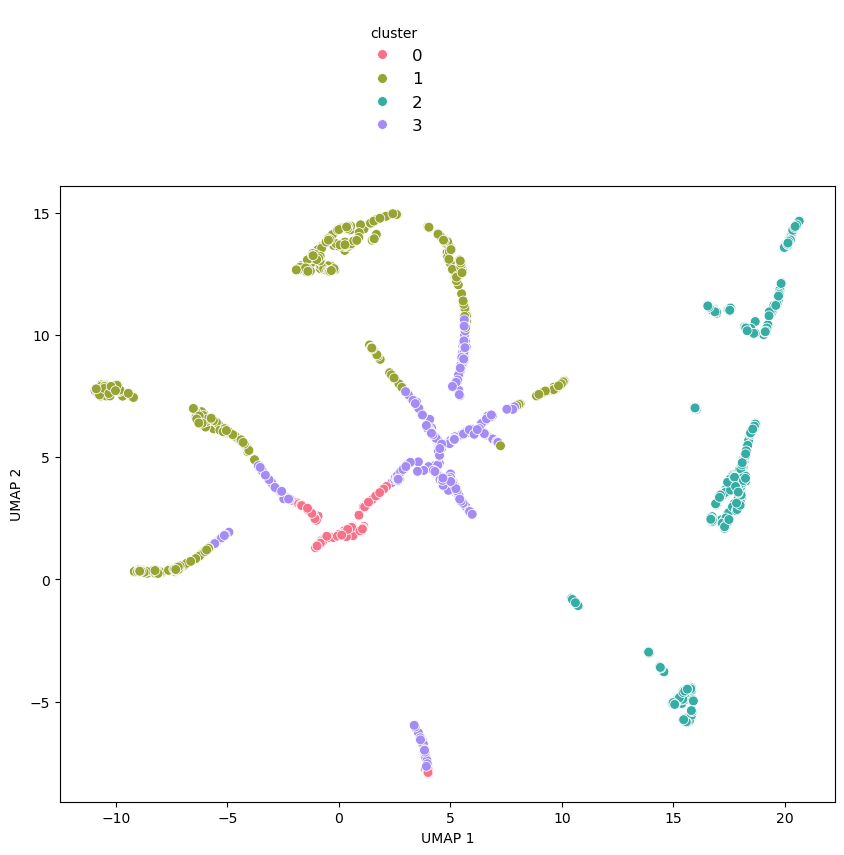

In [63]:
samples_all_clusters_umap.plot_umap(hue='cluster', edgecolor='black', s=50)

{}
{}


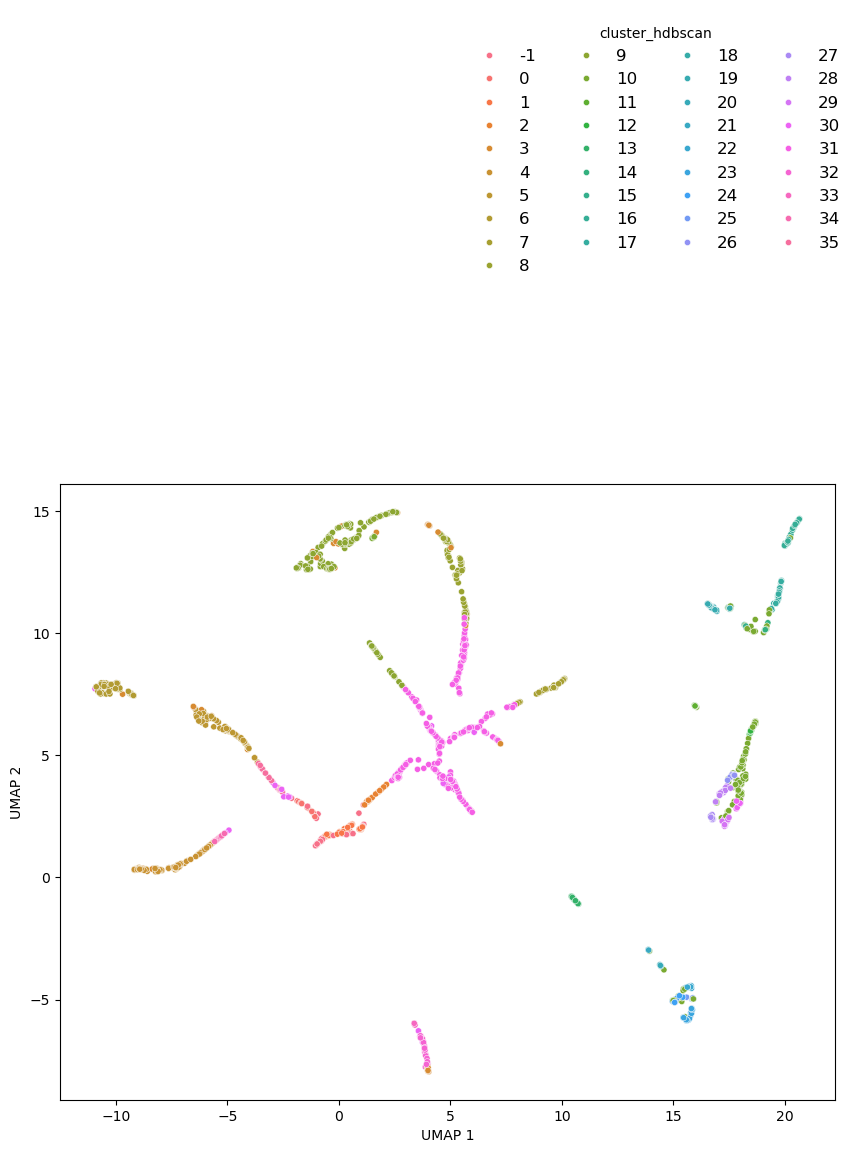

In [42]:
samples_all_clusters_umap.plot_umap(hue='cluster_hdbscan')

In [43]:
samples_all_clusters_umap.plot_interactive_umap(hue='cluster_hdbscan')

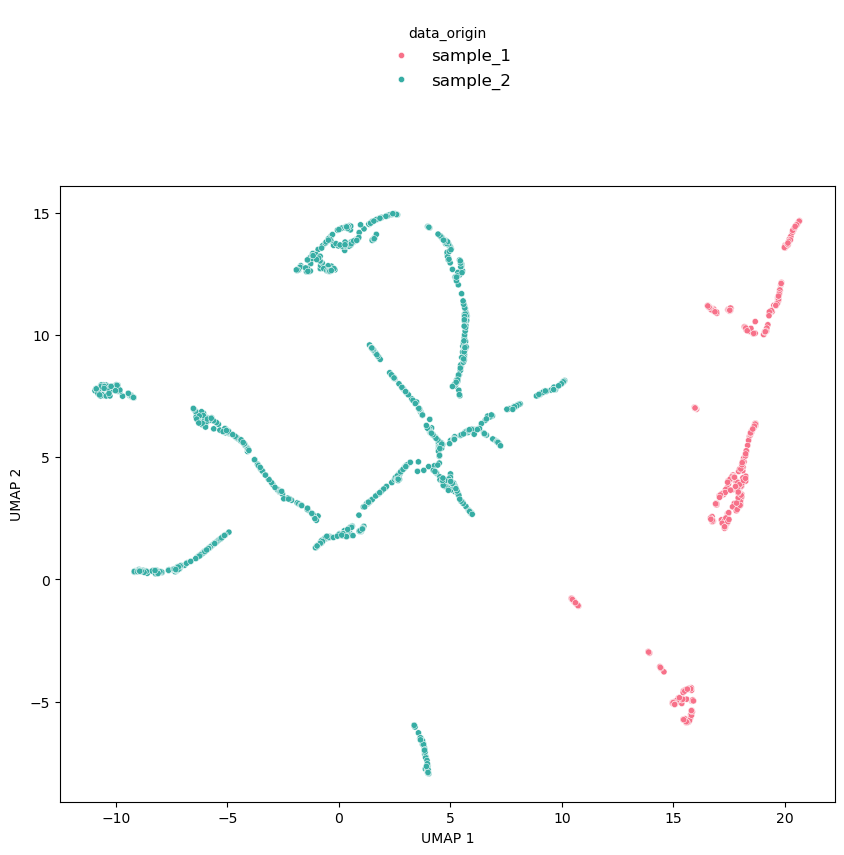

In [60]:
samples_all_clusters_umap.plot_umap(hue='data_origin')

<Axes: xlabel='UMAP_1', ylabel='UMAP_2'>

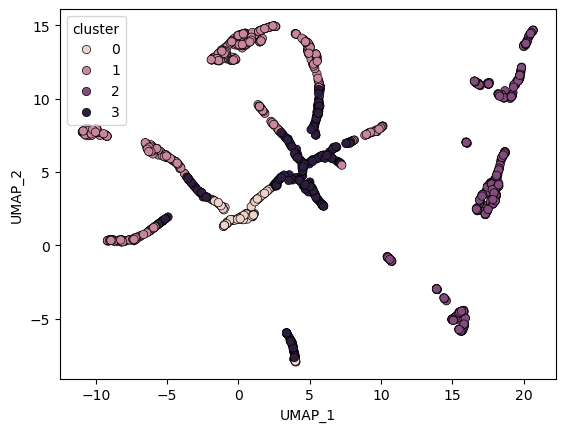

In [61]:
import seaborn as sns
sns.scatterplot(x='UMAP_1', y='UMAP_2', data=samples_all_clusters_umap.umap_data, hue='cluster', edgecolor='black')

## A collection of samples

In [ ]:
#write a loop to loop over all models and calculate the graph metrics

# List all models in the directory
files_embeddings = os.listdir('/Users/vanessamhanna/Nextcloud/TCRpeg/embeddings/structured/')
# Filter for carto 27 files
files_embeddings = [i for i in files_embeddings if '-27' in i]

#iterate over each model, embedding and data file and apply PinferCalculation function
results = []

for embeddings in files_embeddings:
    embedding_file = '/Users/vanessamhanna/Nextcloud/TCRpeg/embeddings/structured/' + embeddings
    name = os.path.basename(embedding_file).split('_structured_embeddings.npy')[0]
    
    # output_dir = '/Users/vanessamhanna/Nextcloud/TCRpeg/'
    
    sample_f = EmbeddingClustering(embedding_file)
    sample_f_clusters = sample_f.run(k=1, sample_size=1000)
    
    sample_f_clusters.metadata['sample']=name
    
    # size_distribution = sample_f_clusters.metadata.groupby('cluster_hdbscan').size() # add to function that calculates distance
    # clustering_proportion = (size_distribution.get(-1) / size_distribution.sum())*100 # add to metadata + degree.. in function
    results.append([name, sample_f_clusters.metadata])
return results

In [ ]:
df_results = pd.concat([result[1] for result in results])
